# Анализ топовых игр на стриминговой платформе Twitch за 2016-2023 годы

## Описание проекта

Мой знакомый решил начать стримить на Twitch. Он попросил меня провести анализ топовых категорий на платформе и ответить на некторые вопросы. Ему нравится жанр MOBA («многопользовательская онлайн боевая арена»), в частности, Dota2. Нужно сравнить среднее количество зрителей Dota 2 и ближайшего конкурента, League of Legends

## Цель проекта 

Провести анализ данных и ответить на следующие вопросы:
<div>

* Месячное количество часов просмотра на twitch по годам

* Каковы 10 лучших игр по общему количеству просмотренных часов за каждый год?

* Как изменилась зрительская аудитория League of Legends с течением времени?

* Как изменилась зрительская аудитория Dota 2 с течением времени?

* Какова взаимосвязь между количеством стримеров и средним количеством зрителей для данной игры?

* Какова взаимосвязь между количеством часов потокового вещания и средним количеством каналов для данной игры? 

* Как варьируется среднее соотношение зрителей в топ-10 категориях за 2022 год? 

* Значительно ли отличается среднее количество зрителей для League of Legends и Dota 2? 

</div>

## Описание данных

Структура <code>Twitch_game_data.csv</code>:


<div>

* <code>Rank</code> — ранг в месяце (1-200),

* <code>Game</code> — название игры,

* <code>Month</code> — рассматриваемый месяц,

* <code>Hours_watched</code> — количество часов просмотра,
    
* <code>Hours_streamed</code> — количество часов стрима,
    
* <code>Peak_viewers</code> — максимальное количество зрителей в один момент времени,   

* <code>Peak_channels</code> — максимальное количество каналов в один момент времени,

* <code>Streamers</code> — количество стримеров, которые транслировали игру

* <code>Avg_viewers</code> — среднее количество зрителей, 

* <code>Avg_channels</code> — среднее количество каналов,
    
* <code>Avg_viewer_ratio</code> — среднее количество зрителей на канал.
        
</div>

## План работы

Исследование пройдет в несколько этапов:

<div>

* Обзор и предобработка данных

* Исследовательский анализ данных

* Статистический анализ данных
    
* Общий вывод  
    
</div>

### Обзор и предобработка данных

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from plotly import graph_objects as go
sns.set()

In [2]:
try:
  data = pd.read_csv('Twitch_game_data.csv', encoding='cp1252')
except:
  print('Что-то пошло не так')  

In [3]:
data.head()

,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17400 entries, 0 to 17399
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              17400 non-null  int64  
 1   Game              17399 non-null  object 
 2   Month             17400 non-null  int64  
 3   Year              17400 non-null  int64  
 4   Hours_watched     17400 non-null  int64  
 5   Hours_streamed    17400 non-null  int64  
 6   Peak_viewers      17400 non-null  int64  
 7   Peak_channels     17400 non-null  int64  
 8   Streamers         17400 non-null  int64  
 9   Avg_viewers       17400 non-null  int64  
 10  Avg_channels      17400 non-null  int64  
 11  Avg_viewer_ratio  17400 non-null  float64
dtypes: float64(1), int64(10), object(1)
memory usage: 1.6+ MB


In [5]:
data.describe()

,Rank,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
count,17400.000000,17400.000000,17400.000000,1.740000e+04,1.740000e+04,1.740000e+04,17400.000000,1.740000e+04,17400.000000,17400.000000,17400.000000
mean,100.500000,6.344828,2019.137931,5.406489e+06,1.740947e+05,6.129193e+04,643.386207,2.082847e+04,7418.131437,238.397586,76.981366
std,57.735964,3.493370,2.096430,1.847645e+07,5.546933e+05,1.479578e+05,2677.160903,6.298185e+04,25362.412291,760.923850,339.203022
min,1.000000,1.000000,2016.000000,8.981100e+04,1.900000e+01,4.410000e+02,1.000000,0.000000e+00,120.000000,0.000000,1.670000
25%,50.750000,3.000000,2017.000000,4.329688e+05,1.414950e+04,9.270000e+03,58.000000,1.724750e+03,593.000000,19.000000,16.317500
50%,100.500000,6.000000,2019.000000,9.594830e+05,3.669700e+04,2.228400e+04,141.000000,4.795000e+03,1315.000000,50.000000,29.340000
75%,150.250000,9.000000,2021.000000,2.690568e+06,9.990650e+04,5.158575e+04,357.000000,1.271675e+04,3695.000000,136.000000,57.257500
max,200.000000,12.000000,2023.000000,3.445520e+08,1.024570e+07,3.366021e+06,129860.000000,1.013324e+06,479209.000000,13789.000000,13601.870000


In [6]:
#Приведем названия колонок к нижнему регистру
data.columns = data.columns.str.lower()
data.columns

Index(['rank', 'game', 'month', 'year', 'hours_watched', 'hours_streamed',
       'peak_viewers', 'peak_channels', 'streamers', 'avg_viewers',
       'avg_channels', 'avg_viewer_ratio'],
      dtype='object')

In [7]:
#Проверка на пропуски
data.isna().sum()

rank                0
game                1
month               0
year                0
hours_watched       0
hours_streamed      0
peak_viewers        0
peak_channels       0
streamers           0
avg_viewers         0
avg_channels        0
avg_viewer_ratio    0
dtype: int64

In [8]:
#Проверка на дубликаты
data.duplicated().sum()

0

In [9]:
#Посмотрим на строку с пропущенным названием игры
data[data['game'].isnull() == True]

,rank,game,month,year,hours_watched,hours_streamed,peak_viewers,peak_channels,streamers,avg_viewers,avg_channels,avg_viewer_ratio
7561,162,NaN,2,2019,317951,77004,30919,5804,21758,473,114,4.13


In [10]:
#Удалим эту строку
data = data.dropna()
data.isna().sum()

rank                0
game                0
month               0
year                0
hours_watched       0
hours_streamed      0
peak_viewers        0
peak_channels       0
streamers           0
avg_viewers         0
avg_channels        0
avg_viewer_ratio    0
dtype: int64

### Исследовательский анализ данных

#### Месячное количество часов просмотра на twitch по годам

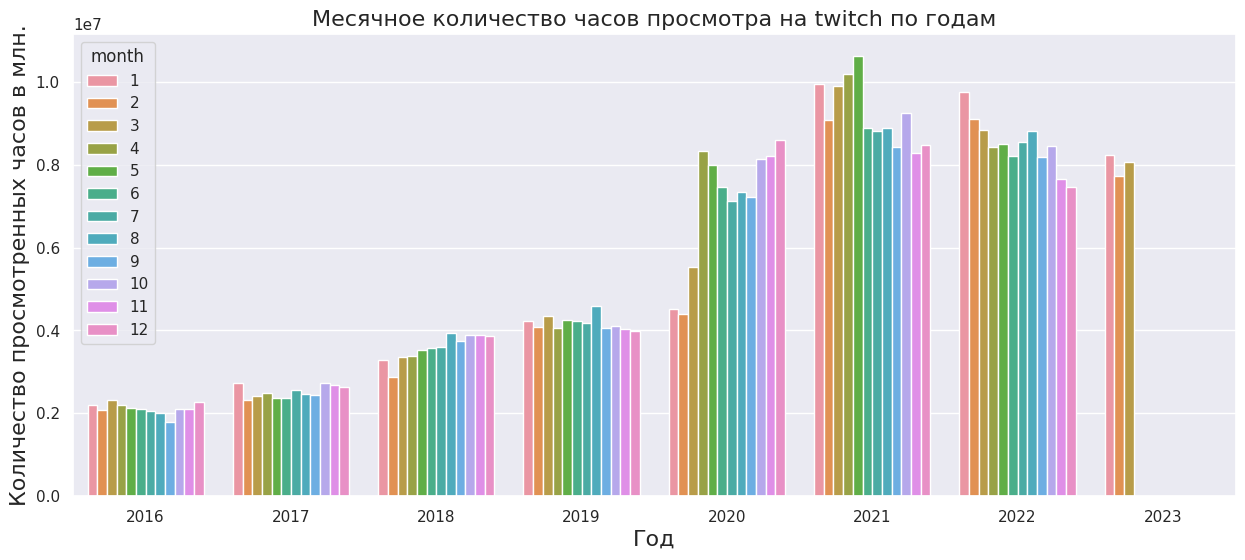

In [11]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='year',
            y='hours_watched',
            hue='month', 
            data=data,
            errorbar=None
            )
ax.set_title('Месячное количество часов просмотра на twitch по годам', fontsize=16)
ax.set_ylabel('Количество просмотренных часов в млн.', fontsize=16)
ax.set_xlabel('Год', fontsize=16)
plt.show()

С 2016 по 2019 год количество просмотров постепенно росло, а потом началась пандемия и количество просмотров резко увеличилось. За 2023 год у нас данные только за первый три месяца

#### Каковы 10 лучших игр по общему количеству просмотренных часов за каждый год? 


In [12]:
# Топ-10 игр по годам
top_10_games = data.groupby(['game', 'year'])['hours_watched'].sum().reset_index() \
                   .sort_values(['year', 'hours_watched'], ascending=[True, False]) \
                   .groupby('year').head(10)
top_10_games

,game,year,hours_watched
1812,League of Legends,2016,1035469850
549,Counter-Strike: Global Offensive,2016,526391918
862,Dota 2,2016,496585969
1517,Hearthstone,2016,474016816
2355,Overwatch,2016,178952454
...,...,...,...
556,Counter-Strike: Global Offensive,2023,159677994
990,Escape from Tarkov,2023,158847382
869,Dota 2,2023,130371779
1240,Fortnite,2023,122783788


In [13]:
#Добавим в него колонку 'percent', в которую поместим отношение количества часов просмотра этой игры по отношению к общему числу часов просмотра в год
total_watched_per_year = top_10_games.groupby('year')['hours_watched'].sum()
total_watched_per_year

year
2016     3243637894
2017     3643597020
2018     5085008994
2019     5775309338
2020     9241983928
2021    12299397829
2022    10767247567
2023     2607803633
Name: hours_watched, dtype: int64

In [14]:
top_10_games = top_10_games.merge(total_watched_per_year.rename('total_watched'), on='year')
top_10_games['percent'] = top_10_games['hours_watched'] / top_10_games['total_watched'] * 100
top_10_games['percent'] = round(top_10_games['percent'], 2)
top_10_games

,game,year,hours_watched,total_watched,percent
0,League of Legends,2016,1035469850,3243637894,31.92
1,Counter-Strike: Global Offensive,2016,526391918,3243637894,16.23
2,Dota 2,2016,496585969,3243637894,15.31
3,Hearthstone,2016,474016816,3243637894,14.61
4,Overwatch,2016,178952454,3243637894,5.52
...,...,...,...,...,...
75,Counter-Strike: Global Offensive,2023,159677994,2607803633,6.12
76,Escape from Tarkov,2023,158847382,2607803633,6.09
77,Dota 2,2023,130371779,2607803633,5.00
78,Fortnite,2023,122783788,2607803633,4.71


In [15]:
fig = px.bar(top_10_games, x='year', y = 'hours_watched', color='game', color_discrete_sequence=px.colors.qualitative.Prism, \
             title = '10 лучших категорий по общему количеству просмотренных часов за каждый год', width=1000, height=1000,\
             text=top_10_games['percent'],\
            labels={
                     "year": "Год",
                     "hours_watched": "Количество просмотренных часов",
                     "game": "Категория"})
fig.update_layout(barmode='stack', xaxis={'categoryorder': 'total descending'})
fig.update_xaxes(tickangle=45)
fig.update_traces(textfont_size=20, textangle=0)
fig.show() 

Среди игр за все рассматриваемые года League of Legends с большим отрывом лидирует по числу просмотров, за исключением двух случаев: в 2018 году Fortnite был заметно впереди всех, а в 2021 GTA V немного опередила LOL. В 2019 году на твиче появилась новая категория Just Chatting, в который стример просто общается с пользователями или смотрит вместе с ними контент. С 2020 по 2023 года эта категория стала самой популярной на стриминговой платформе с существенным отрывом от прочих категорий.



#### Как изменилась зрительская аудитория League of Legends с течением времени?

In [16]:
lol = data[data['game'] == 'League of Legends']
lol = lol.groupby(['year'], as_index=False)['hours_watched'].sum().sort_values(by='year')
lol

,year,hours_watched
0,2016,1035469850
1,2017,1022398595
2,2018,985380685
3,2019,1118435546
4,2020,1553536532
5,2021,1735661105
6,2022,1556699612
7,2023,362479603


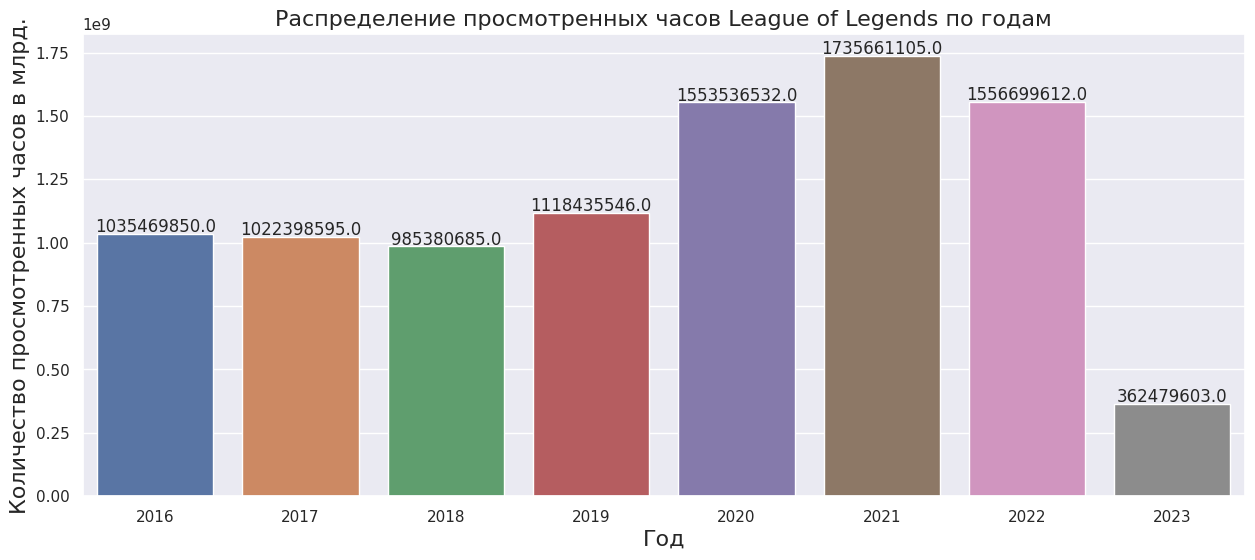

In [33]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='year', y='hours_watched', data=lol)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 
                                      2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
ax.set_title('Распределение просмотренных часов League of Legends по годам', fontsize=16)
ax.set_ylabel('Количество просмотренных часов в млрд.', fontsize=16)
ax.set_xlabel('Год', fontsize=16)
plt.show()

По графику видим, что с 2016 по 2018 количество просмотренных часов постепенно падало, а с 2019 по 2021 был большой рост. В 2022 кол-во просмотром немного уменьшилось, а за 2023 пока говорить сложно, т.к. по нему у нас неполные данные. Кроме 2018 года, за все года больше миллиарда просмотров 

#### Как изменилась зрительская аудитория Dota 2 с течением времени?

In [18]:
dota2 = data[data['game'] == 'Dota 2']
dota2 = dota2.groupby(['year'], as_index=False)['hours_watched'].sum().sort_values(by='year')
dota2

,year,hours_watched
0,2016,496585969
1,2017,449879503
2,2018,472414819
3,2019,503022570
4,2020,497151335
5,2021,578484298
6,2022,532253215
7,2023,130371779


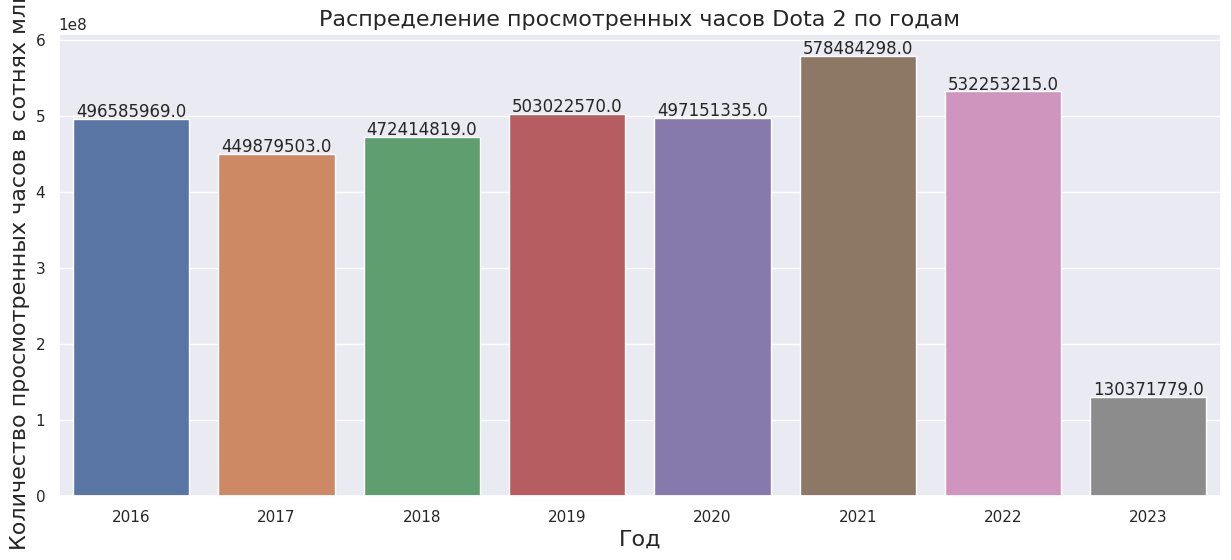

In [31]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='year', y='hours_watched', data=dota2)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 
                                      2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
ax.set_title('Распределение просмотренных часов Dota 2 по годам', fontsize=16)
ax.set_ylabel('Количество просмотренных часов в сотнях млн.', fontsize=16)
ax.set_xlabel('Год', fontsize=16)
plt.show()

В период с 2016 по 2020 количество просмотренных часов немного варьировалось, и за исключением спада в 2017 и 2018 годах в среднем было равно 500 млн. часов. В 2021 показатель вырос до 578 миллионов часов, в 2022 упал до 532 миллинов. За 2023 год у нас есть данные только ща первые три месяца

#### Какова взаимосвязь между количеством стримеров и средним количеством зрителей для данной игры?

In [20]:
print(data['streamers'].corr(data['avg_viewers']))

0.7381028256381931


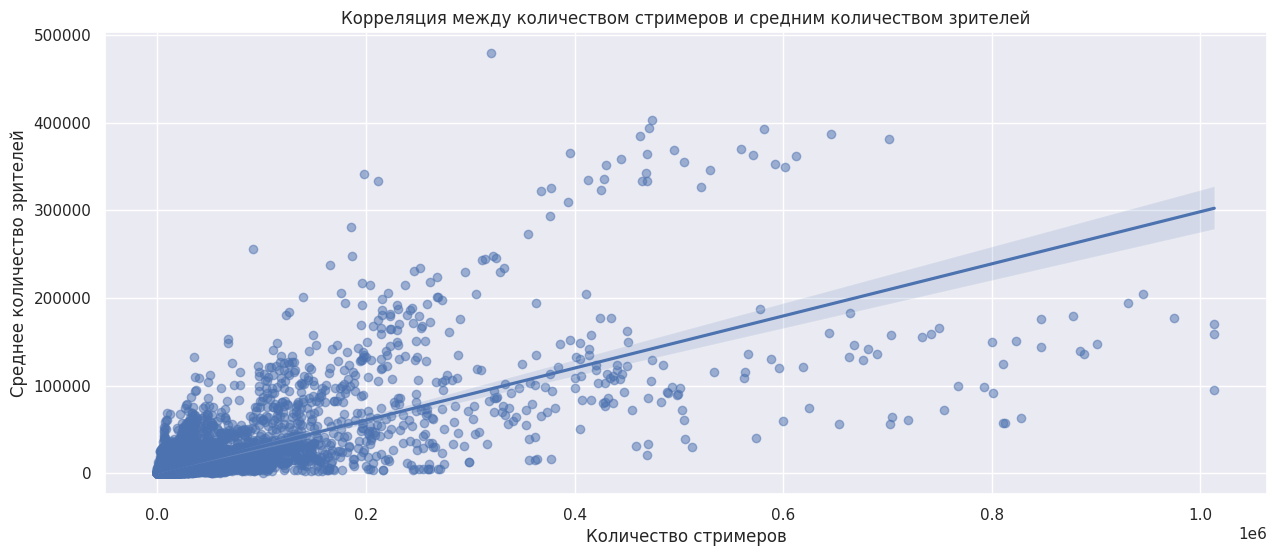

In [21]:
plt.figure(figsize=(15, 6))
# Создание scatter plot с линией регрессии
sns.regplot(x='streamers', y='avg_viewers', data=data, scatter_kws={'alpha':0.5})

# Установка заголовка и меток осей
plt.title('Корреляция между количеством стримеров и средним количеством зрителей')
plt.xlabel('Количество стримеров')
plt.ylabel('Среднее количество зрителей')

# Отображение графика
plt.show()

Корреляция в значении 0.74 между количеством стримеров и средним количеством зрителей для данной игры указывает на сильную положительную связь между этими двумя переменными. Это означает, что чем больше стримеров у игры, тем выше среднее количество зрителей, и наоборот.

#### Какова взаимосвязь между количеством часов потокового вещания и средним количеством каналов для данной игры?



In [22]:
print(data['hours_streamed'].corr(data['avg_channels']))

0.999523166666515


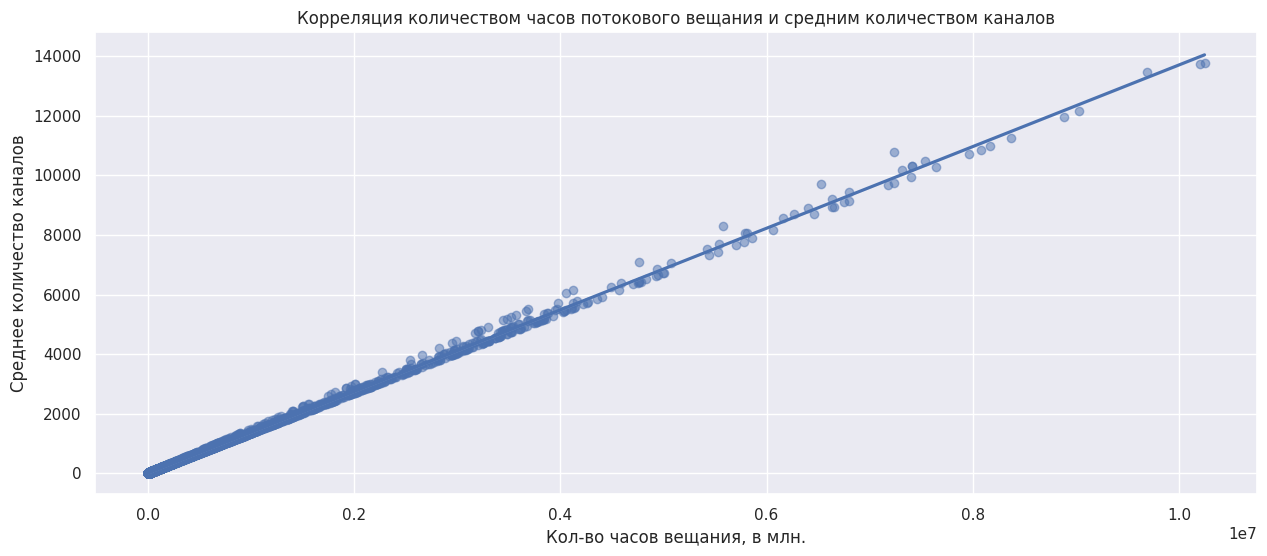

In [23]:
plt.figure(figsize=(15, 6))
# Создание scatter plot с линией регрессии
sns.regplot(x='hours_streamed', y='avg_channels', data=data, scatter_kws={'alpha':0.5})

# Установка заголовка и меток осей
plt.title('Корреляция количеством часов потокового вещания и средним количеством каналов')
plt.xlabel('Кол-во часов вещания, в млн.')
plt.ylabel('Среднее количество каналов')

# Отображение графика
plt.show()

Корреляция в значении 0.99 между количеством часов потокового вещания и средним количеством каналов указывает на очень сильную положительную связь между этими двумя переменными. Это означает, что с увеличением количества часов потокового вещания также увеличивается и среднее количество каналов.

На практике это может означать, что игра, которая имеет большое количество часов потокового вещания, также обычно имеет большое среднее количество каналов. Это может быть связано с популярностью игры, привлекательностью для стримеров и зрителей, а также другими факторами, которые способствуют активности потокового вещания и созданию новых каналов.

В целом, высокая корреляция 0.99 говорит о том, что эти две переменные тесно связаны и меняются вместе. Однако, помимо корреляции, для полного понимания и анализа важно учитывать и другие факторы, которые могут влиять на эти переменные.

#### Как варьируется среднее соотношение зрителей в топ-10 категориях за 2022 год?

In [24]:
mean_viewer_ratio = data.query('year == 2022')
mean_viewer_ratio = mean_viewer_ratio.groupby('game', as_index=False)['avg_viewers'].mean().sort_values(by='avg_viewers', ascending=False)
mean_viewer_ratio['avg_viewers'] = round(mean_viewer_ratio['avg_viewers'], 2)
mean_viewer_ratio = mean_viewer_ratio.head(10)
mean_viewer_ratio

,game,avg_viewers
201,Just Chatting,359071.92
209,League of Legends,177922.08
167,Grand Theft Auto V,161821.08
432,VALORANT,132682.33
65,Counter-Strike: Global Offensive,80274.00
17,Apex Legends,75391.00
142,Fortnite,71081.67
242,Minecraft,62497.75
99,Dota 2,60705.58
50,Call of Duty: Warzone,50157.00


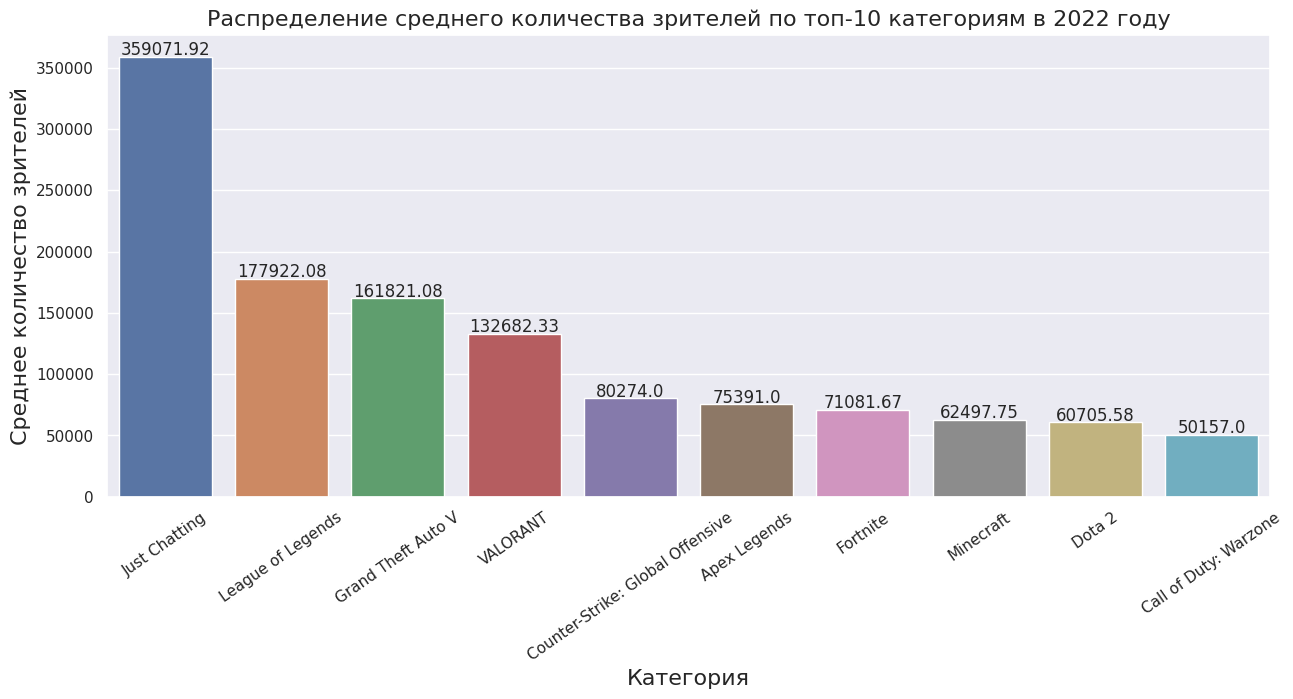

In [25]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='game', y='avg_viewers', data=mean_viewer_ratio)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 
                                      2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
ax.set_title('Распределение среднего количества зрителей по топ-10 категориям в 2022 году', fontsize=16)
ax.set_ylabel('Среднее количество зрителей', fontsize=16)
ax.set_xlabel('Категория', fontsize=16)
ax.set_xticklabels(labels =mean_viewer_ratio['game'], rotation=35)
plt.show()

Ожидаемо, категория Just Chatting на первом месте по среднему количеству зрителей за 2022 год, в 2 раза больше, чем у второго места. Из игр c Большим средним количеством зрителей можно выделить League of Legends, Grand Theft Auto V и VALORANT.

### Статистический анализ данных

#### Значительно ли отличается среднее количество зрителей для League of Legends и Dota 2?

Для начала подготовим данные и построим графики

In [26]:
lol_data = data[data['game'] == 'League of Legends']['avg_viewers']
dota2_data = data[data['game'] == "Dota 2"]['avg_viewers']

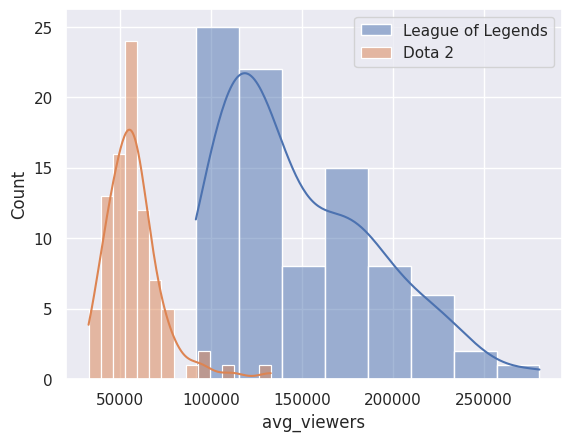

In [27]:
sns.histplot(lol_data, kde=True, label='League of Legends')
sns.histplot(dota2_data, kde=True, label='Dota 2')
plt.legend()
plt.show()

Распределения не похожи на номральные. Посмотрим значения перекосов и эксцессов

In [28]:
print('League of Legends:')
print('Перекос:', lol_data.skew())
print('Эксцесс:', lol_data.kurt())

print('Dota 2:')
print('Перекос:', dota2_data.skew())
print('Эксцесс:', dota2_data.kurt())

League of Legends:
Перекос: 0.8662454712984011
Эксцесс: 0.08898625607756117
Dota 2:
Перекос: 1.919306938855909
Эксцесс: 6.239977004331612


<b>League of Legends:</b>

Перекос: 0,866

Значение асимметрии 0,866 указывает на слегка положительно асимметричное распределение. Это означает, что распределение имеет более длинный хвост в правой части, что говорит о большем количестве зрителей для некоторых наблюдений.

Эксцесс: 0,089

Значение эксцесса 0,089 указывает на относительно ровное распределение по сравнению с нормальным распределением. Это означает, что в распределении меньше экстремальных выбросов или необычно высоких пиков по сравнению с нормальным распределением.

<b>Dota 2:</b>

Перекос: 1,919

Значение перекоса 1,919 указывает на умеренно положительно перекошенное распределение. Это говорит о более длинном хвосте с правой стороны, что указывает на большее количество зрителей для некоторых наблюдений.

Эксцесс: 6,240

Значение эксцесса 6,240 указывает на распределение с большими хвостами и потенциально более высоким пиком по сравнению с нормальным распределением. Это указывает на наличие выбросов или экстремальных значений, которые отклоняются от нормального распределения.

В целом, оба набора данных демонстрируют положительный перекос, что указывает на более длинный хвост с правой стороны и большую концентрацию зрителей в определенных наблюдениях. Значения эксцесса также указывают на отклонение от нормального распределения, причем у Dota 2 значение эксцесса выше, что указывает на более длинные хвосты и потенциально более экстремальные значения.

Эти данные свидетельствуют о том, что распределения наборов данных могут не соответствовать предположению о нормальности, необходимому для t-теста. Поэтому нужно использовать непараметрический тест или преобразовать данные для обеспечения достоверности статистического анализа и интерпретации.

Для большей уверенности выполним проверку Шапиро-Уилка на нормальность распределений

In [29]:
stat, p = shapiro(lol_data)
print('League of Legends тест Шапиро-Уилка, p-value:', p)

stat, p = shapiro(dota2_data)
print('Dota 2 тест Шапиро-Уилка, p-value:', p)

League of Legends тест Шапиро-Уилка, p-value: 4.3899122829316184e-05
Dota 2 тест Шапиро-Уилка, p-value: 1.5081471360645082e-07


Так как p-value в обоих случаях получилось меньше 0.05, мы отвергаем гипотезу о том, что данные распределены нормально

Будем использовать непараметрический тест, например U-тест Манна-Уитни, чтобы сравнить среднее количество зрителей для League of Legends и Dota 2. U-тест Манна-Уитни не предполагает определенного распределения и может использоваться с перекошенными данными.

Сформулируем гипотезы: 

<b>H0: Различий в среднем количестве зрителей League of Legends и Dota 2 нет</b>

<b>Н1: Различия в среднем количестве зрителей League of Legends и Dota 2 есть</b>

In [30]:
stat, p_value = mannwhitneyu(lol_data, dota2_data)

print(p_value)

alpha = 0.05  # Уровень статистической значимости

if p_value < alpha:
    print("Среднее количество зрителей для League of Legends и Dota 2 значительно отличается.")
else:
    print("Нет существенной разницы в среднем количестве зрителей для League of Legends и Dota 2.")

4.522553728030889e-29
Среднее количество зрителей для League of Legends и Dota 2 значительно отличается.


## Общий вывод

<div>

<B>Обзор и предобработка данных</B>

Данные были загружены в файл, всего 17400 строк. В ходе предобработки была удалена строка с пропущенными данными, изменен регистр столбцов на нижний. Дубликатов не обнаружено.

<B>Исследовательский анализ данных</B>

В ходе анализа данных были получены ответы на несколько вопросов:

<i>Месячное количество часов просмотра на twitch по годам</i>

С 2016 по 2019 год количество просмотров постепенно росло, а потом началась пандемия и количество просмотров резко увеличилось. За 2023 год у нас данные только за первый три месяца.

<i>Каковы 10 лучших игр по общему количеству просмотренных часов за каждый год?</i>

Среди игр за все рассматриваемые года League of Legends с большим отрывом лидирует по числу просмотров, за исключением двух случаев: в 2018 году Fortnite был заметно впереди всех, а в 2021 GTA V немного опередила LOL. В 2019 году на твиче появилась новая категория Just Chatting, в который стример просто общается с пользователями или смотрит вместе с ними контент. С 2020 по 2023 года эта категория стала самой популярной на стриминговой платформе с существенным отрывом от прочих категорий.

<bi>Как изменилась зрительская аудитория League of Legends с течением времени?</i>

C 2016 по 2018 количество просмотренных часов постепенно падало, а с 2019 по 2021 был большой рост. В 2022 кол-во просмотром немного уменьшилось. Кроме 2018 года, за все года больше миллиарда просмотров. За 2023 год у нас есть данные только за первые три месяца

<i>Как изменилась зрительская аудитория Dota 2 с течением времени?</i>

В период с 2016 по 2020 количество просмотренных часов немного варьировалось, и за исключением спада в 2017 и 2018 годах в среднем было равно 500 млн. часов. В 2021 показатель вырос до 578 миллионов часов, в 2022 упал до 532 миллинов. За 2023 год у нас есть данные только за первые три месяца.

<i>Какова взаимосвязь между количеством стримеров и средним количеством зрителей для данной игры?</i>

Корреляция в значении 0.74 между количеством стримеров и средним количеством зрителей для данной игры указывает на сильную положительную связь между этими двумя переменными. Это означает, что чем больше стримеров у игры, тем выше среднее количество зрителей, и наоборот.

<i>Какова взаимосвязь между количеством часов потокового вещания и средним количеством каналов для данной игры?</i>

Корреляция в значении 0.99 между количеством часов потокового вещания и средним количеством каналов указывает на очень сильную положительную связь между этими двумя переменными. Это означает, что с увеличением количества часов потокового вещания также увеличивается и среднее количество каналов.


В целом, высокая корреляция 0.99 говорит о том, что эти две переменные тесно связаны и меняются вместе. Однако, помимо корреляции, для полного понимания и анализа важно учитывать и другие факторы, которые могут влиять на эти переменные.

<i>Как варьируется среднее соотношение зрителей в топ-10 категориях за 2022 год?</i>

Ожидаемо, категория Just Chatting на первом месте по среднему количеству зрителей за 2022 год, в 2 раза больше, чем у второго места. Из игр c Большим средним количеством зрителей можно выделить League of Legends, Grand Theft Auto V и VALORANT.

<B>Статистический анализ данных</B>

Нужно было проверить следующие гипотезы:

<b>H0: Различий в среднем количестве зрителей League of Legends и Dota 2 нет</b>

<b>Н1: Различия в среднем количестве зрителей League of Legends и Dota 2 есть</b>    

В ходе статистического анализа данных были подготовлены два набора данных. В ходе их исследования выяснилось, что распределения в них не являюются нормальными, из-за чего был использован непараметрический U-тест Манна-Уитни, чтобы сравнить среднее количество зрителей для League of Legends и Dota 2. U-тест Манна-Уитни не предполагает определенного распределения и может использоваться с перекошенными данными.

В результате теста значение P-value оказалось значительно меньше, чем уровень статистической значимости 0.05. Значит, нулевая гипотеза отвергается в пользу альтернативной
    
</div>

В целом, League of Legend гораздо популярнее, чем Dota 2. И если отбросить личные предпочтения, я бы рекомендовал другу стримить на Twitch именно эту игру